In [2]:
import pandas_datareader as pdr 
import datetime as dt 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pdr.DataReader('SPY', data_source='yahoo', start = dt.date(2000, 1, 2), end = dt.date(2022, 1, 1))

<AxesSubplot:xlabel='Date'>

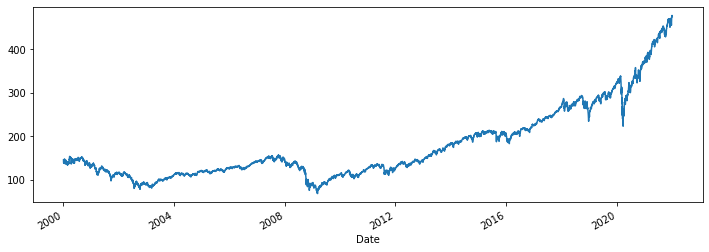

In [4]:
df['Close'].plot(figsize = (12, 4))

In [5]:
# group data to weekly
df_weekly = df['Close'].resample('W').last().pct_change().dropna()
df_weekly.head()

Date
2000-01-16    0.008362
2000-01-23   -0.017223
2000-01-30   -0.059282
2000-02-06    0.049448
2000-02-13   -0.027394
Freq: W-SUN, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

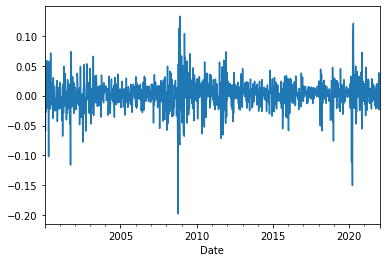

In [6]:
df_weekly.plot()

In [7]:
# check for stationarity
pd.Series(adfuller(df_weekly, regresults = False), index = ['adf', 'p-value', 'used_lag', 'n_obs', 'critical_values', 'max_ic'])

adf                                                       -14.111004
p-value                                                          0.0
used_lag                                                           6
n_obs                                                           1140
critical_values    {'1%': -3.4360991979671205, '5%': -2.864078635...
max_ic                                                  -5148.550769
dtype: object

In [8]:
# let's model three variance regimes 

# Fit the model
mod_kns = sm.tsa.MarkovRegression(df_weekly, k_regimes=4, trend='n', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

/Users/sinpasin/Codes/bitbucket_source/coding_for_investments/env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1147
Model:               MarkovRegression   Log Likelihood                2822.189
Date:                Thu, 10 Mar 2022   AIC                          -5612.377
Time:                        21:44:48   BIC                          -5531.659
Sample:                    01-16-2000   HQIC                         -5581.903
                         - 01-02-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002        nan        nan        nan         nan         nan
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0005   4.78e-05      9.503      0.000       0.000       0.001
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0013   7.92e-05     16.299      0.000       0.001       0.001
                             Regime 3 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0076      0.002      3.504      0.000       0.003       0.012
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9788        nan        nan        nan         nan         nan
p[1->0]        0.0316        nan        nan        nan         nan         nan
p[2->0]        0.0003        nan        nan        nan         nan         nan
p[3->0]        0.0015        nan        nan        nan         nan         nan
p[0->1]        0.0190        nan        nan        nan         nan         nan
p[1->1]        0.9185        nan        nan        nan         nan         nan
p[2->1]        0.0878        nan        nan        nan         nan         nan
p[3->1]        0.0339        nan        nan        nan         nan         nan
p[0->2]        0.0012        nan        nan        nan         nan         nan
p[1->2]        0.0424      0.022      1.887      0.059      -0.002       0.087
p[2->2]        0.9094        nan        nan        nan         nan         nan
p[3->2]        0.0842        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

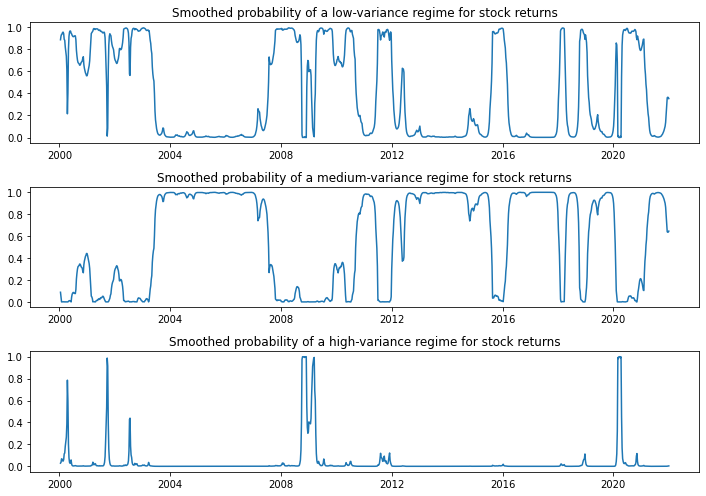

In [12]:
# Plot smooth probabilities of each regime
fig, axes = plt.subplots(3, figsize=(10,7))

ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')

ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for stock returns')

ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')

fig.tight_layout()

In [36]:
# # create a result table
# res_kns.smoothed_marginal_probabilities.plot(figsize = (12, 4))
# plt.legend(loc = 'best')
# plt.show()

<h1 style="color:orange">Regime Analysis on the US' PCE</h1>
<p>Source: <a href="https://towardsdatascience.com/a-worms-eye-view-of-the-markov-switching-dynamic-regression-model-2fb706ba69f3">TowardsDataScience</a></p>

In [14]:
path = './test/regime_us_pce/UMCSENT_PCE.csv'
raw = pd.read_csv(path, header = 0, index_col = 0, infer_datetime_format = True, parse_dates = ['DATE'])

# set index frequency to 'Month-Start' 
df = raw.copy()
df = df.asfreq('MS')

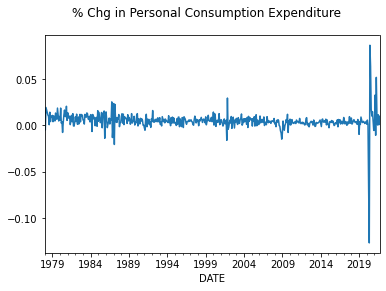

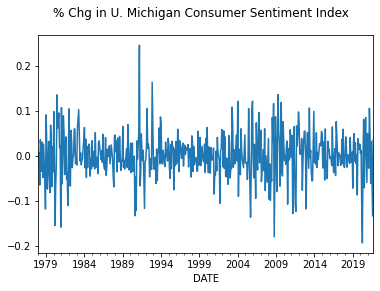

In [10]:
fig = plt.figure()
fig.suptitle('% Chg in Personal Consumption Expenditure')
df['PCE_CHG'].plot()
plt.show()
fig = plt.figure()
fig.suptitle('% Chg in U. Michigan Consumer Sentiment Index')
df['UMCSENT_CHG'].plot()
plt.show()

In [11]:
msdr_model = sm.tsa.MarkovRegression(endog=df['PCE_CHG'], k_regimes=2, trend='c', exog=df['UMCSENT_CHG'], switching_variance=True)
msdr_model_results = msdr_model.fit(iter=1000)

/Users/pasin/Codes/Python/_investments/env/lib/python3.7/site-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: iter. After release 0.14, this will raise.
  FutureWarning


In [12]:
print(msdr_model_results.summary())

                        Markov Switching Model Results                        
Dep. Variable:                PCE_CHG   No. Observations:                  525
Model:               MarkovRegression   Log Likelihood                2026.787
Date:                Sun, 13 Mar 2022   AIC                          -4037.575
Time:                        18:58:45   BIC                          -4003.468
Sample:                    01-01-1978   HQIC                         -4024.219
                         - 09-01-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.000     24.845      0.000       0.004       0.005
x1             0.0026      0.004      0.653      0.5

<function matplotlib.pyplot.show(close=None, block=None)>

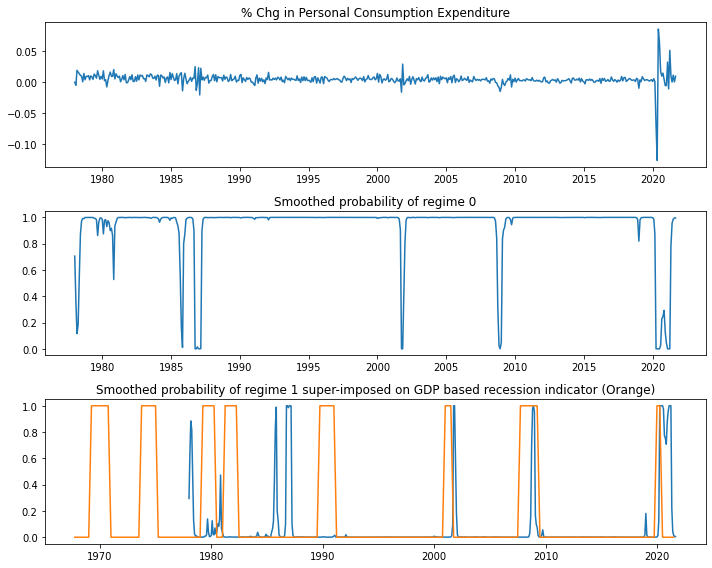

In [17]:
df_r = pd.read_csv('./test/regime_us_pce/JHDUSRGDPBR.csv', header=0, index_col=0, infer_datetime_format=True, parse_dates=['DATE'])

figure, axes = plt.subplots(3, figsize = (10, 8))
ax = axes[0]
ax.plot(df.index, df['PCE_CHG'])
ax.set(title='% Chg in Personal Consumption Expenditure')

ax = axes[1]
ax.plot(df.index, msdr_model_results.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of regime 0')

ax = axes[2]
ax.plot(df.index, msdr_model_results.smoothed_marginal_probabilities[1])
ax.plot(df_r.index, df_r['JHDUSRGDPBR'])
ax.set(title='Smoothed probability of regime 1 super-imposed on GDP based recession indicator (Orange)')

plt.tight_layout() 
plt.show